#  Basic Data Science in Python - Exercises 11/10  #

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture as GM
import seaborn as sns

### Exercise 1: Data Preprocessing
Let us brush up on the Data Preprocessing we learnt in the last course. 

###### Task 1
First, import the dataset $\texttt{netflix_titles.csv}$ from the data folder. 

In [27]:
netflix = pd.read_csv("../data/netflix_titles.csv")
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


##### Task 2
There are some null-values in the duration column. This is because these values have turned up in the rating coloumn instead. Move these duration values from the rating coloumn to the duration coloumn. You can replace them with NaN for now.

In [28]:
nans = netflix.isna()
null_duration = netflix.loc[nans[["duration"]].any(axis= 1), :]
netflix.loc[nans[["duration"]].any(axis=1), "duration"] = null_duration["rating"]
netflix.loc[nans[["duration"]].any(axis=1), "rating"] = null_duration["duration"]
netflix.loc[nans[["duration"]].any(axis= 1), :]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


###### Task 3
Create two new data frames, one for movies and one for TV-shows. Create a barplot of the age rating of the movies on Netflix.

In [32]:
movies = netflix.loc[netflix["type"]=="Movie"]
shows = netflix.loc[netflix["type"]=="TV Show"]
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


<Axes: >

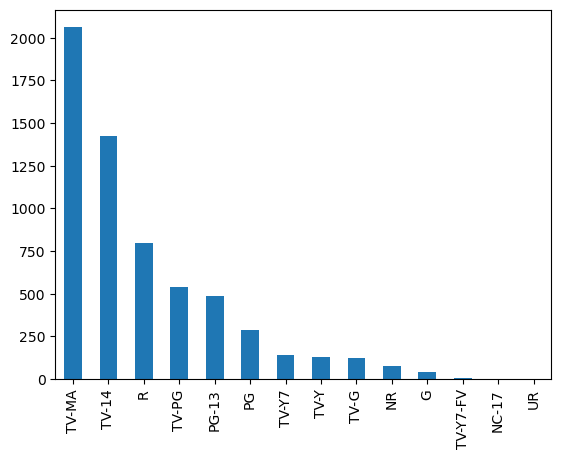

In [30]:
ax = movies["rating"].value_counts().plot.bar()
ax

##### Task 4
Let's see if the percentage of horror movies rated R are higher than the percentage of general movies rated R. Find the percentage of horror movies rated R, and compare that to the percentage of movies rated R

In [34]:
n = movies.shape[0]
r_rated = movies.loc[movies["rating"] == "R"]
print("Percentage of movies rated R:", r_rated.shape[0]/n*100, "%")
is_horror = ["Horror" in s for s in movies["listed_in"]]
horror = movies.loc[is_horror]
r_rated_horror = horror.loc[horror["rating"] == "R"]
print("Percentage of horror rated R:", r_rated_horror.shape[0]/horror.shape[0]*100, "%")

Percentage of movies rated R: 12.999510683412169 %
Percentage of horror rated R: 27.170868347338935 %


### Exercise 2: Statistics with Python
Use pandas to calculate the contingency table, and use the $\texttt{scipy.stats}$ library to perform a Chi-Squared test for independence on the Titanic dataset. What can you conclude?

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


<Axes: xlabel='Survived', ylabel='Pclass'>

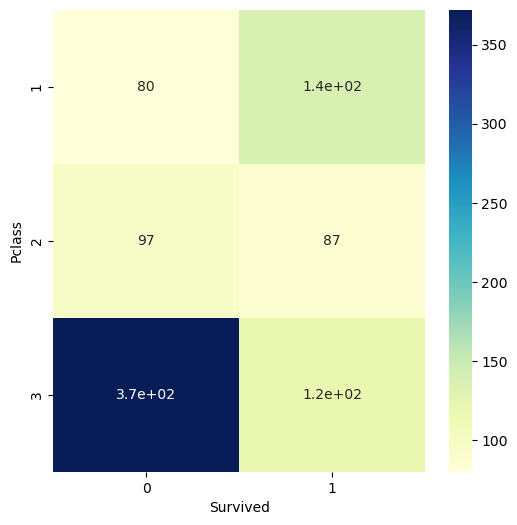

In [35]:
from scipy.stats import chi2_contingency
titanic = pd.read_csv("../data/titanic.csv")

### YOUR CODE HERE - calculate the contingency table
contingency = pd.crosstab(titanic["Pclass"], titanic["Survived"])
### YOUR CODE HERE
print(contingency)

#code to visualize the contingency table
plt.figure(figsize=(6,6))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [37]:
### YOUR CODE HERE - perform chi2 test
c, p, dof, expected = chi2_contingency(contingency)
print("Chi2:", c)
print("p-value:", p)
print("degrees of freedom:", dof)

Chi2: 102.88898875696056
p-value: 4.549251711298793e-23
degrees of freedom: 2


### Exercise 3: The Hello World of Scikit Learn
Let's get comfortable with using methods from scikit learn. It is often a good idea to take a look at the [documentation](https://scikit-learn.org/stable/) of a method before using it. Take a look at the documentation for [k-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) and use this method to cluster the below dataset.

/Users/mke/miniconda3/envs/py23/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


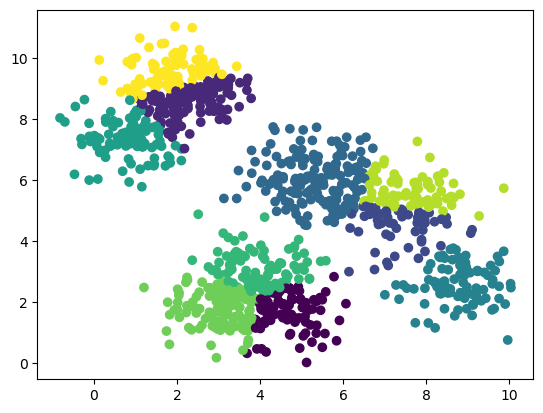

In [10]:
num = 10
X, y = datasets.make_blobs(n_samples=1000, centers=num, n_features=2, center_box=(0, 10), cluster_std=0.7, random_state=5)
#clusters = [0 for _ in range(X.shape[0])]
### YOUR CODE HERE
clusters = KMeans(n_clusters=num, max_iter=1).fit_predict(X)
### YOUR CODE HERE
plt.scatter(*X.T, c=clusters)

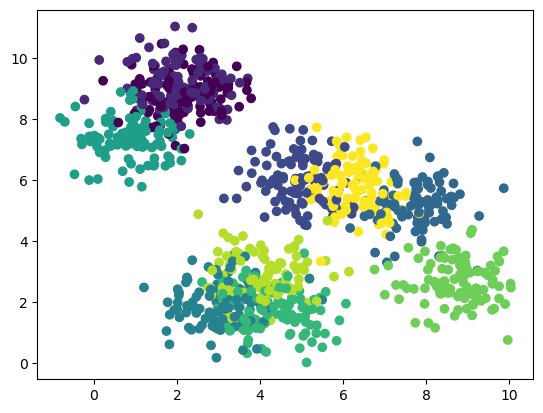

In [11]:
plt.scatter(*X.T, c=y)

### Exercise 4: PCA and EM (Handin)
Use Principal Component Analysis to reduce the dimensionality of the Iris Dataset to 2D, and then use Gaussian Mixtures to assign the points to three clusters.

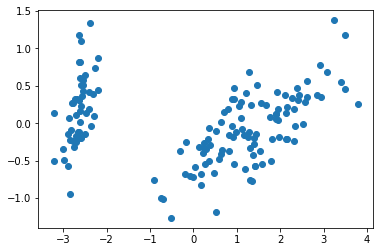

In [39]:
iris = datasets.load_iris()
X = iris.data
X_reduced = PCA(n_components=2).fit_transform(X)
plt.scatter(*X_reduced.T)

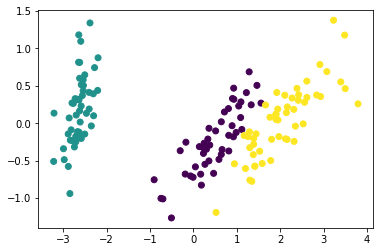

In [40]:
y = GM(n_components=3).fit_predict(X_reduced)
plt.scatter(*X_reduced.T, c=y)

### Exercise 5: PCA as Noise Filtering
Principal Component Analysis can be used to filter noisy data. Below is a dataset consisting of handwritten digits, with added noise:

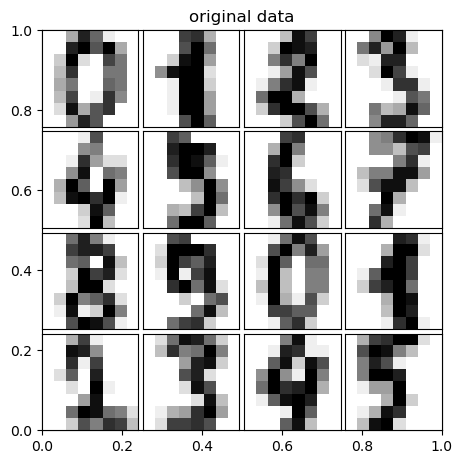

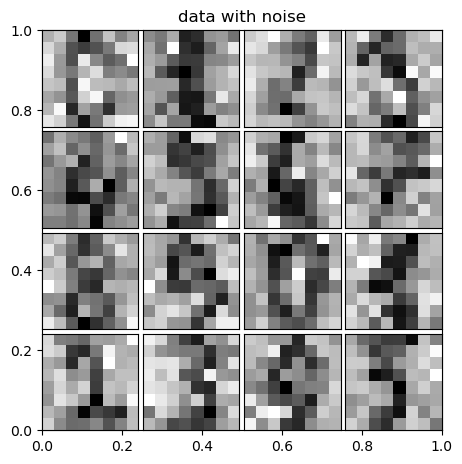

In [2]:
def plot_digits(digits, label=""):
    fig = plt.figure(figsize=(4, 4))
    plt.title(label)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(16):
        ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
        ax.imshow(digits[i].reshape(8,8), cmap=plt.cm.binary, interpolation='nearest')

#Original dataset
digits = datasets.load_digits().data
plot_digits(digits, label="original data")

#Dataset with noise
np.random.seed(42)
noisy_digits = np.random.normal(digits, 4)
plot_digits(noisy_digits, label="data with noise")

Use PCA to filter some of the noise out. You can do this by first computing the principal components, and then inverse transform these.

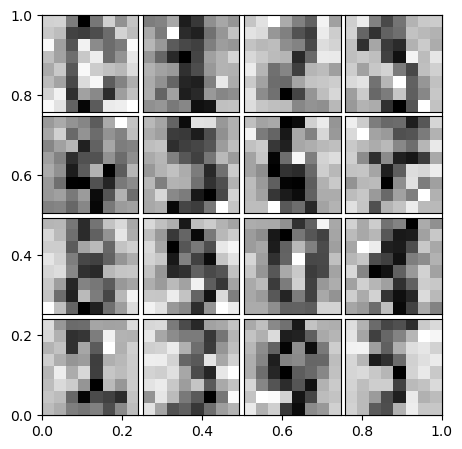

In [55]:
### YOUR CODE HERE
pca = PCA(0.9).fit(noisy_digits)
components = pca.transform(noisy_digits)
filtered_digits = pca.inverse_transform(components)
plot_digits(filtered_digits)



### Exercise 6: Implement k-Means (Hard)

Implement a simple k-Means algorithm, and test your implementation on the below dataset. Just run for a fixed number of iterations $\texttt{max_iter}$, so don't worry about convergence.

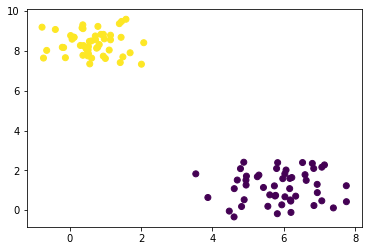

In [63]:
X, y = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 10), cluster_std=0.7)
plt.scatter(*X.T, c=y)

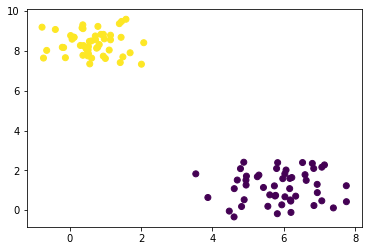

In [64]:
def kMeans(X, k=2, max_iter = 100):
    
    #initialize random clusters
    clusters = [0 for _ in range(X.shape[0])]
    mu = X[np.random.choice(X.shape[0], k)]
    
    for _ in range(max_iter):
        
    ### YOUR CODE HERE
        for i, x in enumerate(X):
            j = np.argmin([np.linalg.norm(x - mui) for mui in mu], axis=0)
            clusters[i] = j
        for i in range(k):
            c = np.array([X[j] for j in range(X.shape[0]) if clusters[j] == i])
            mu[i] = np.mean(c, axis=0)
    ### YOUR CODE HERE
    
    return clusters

plt.scatter(*X.T, c=kMeans(X))